0.5125
0.65


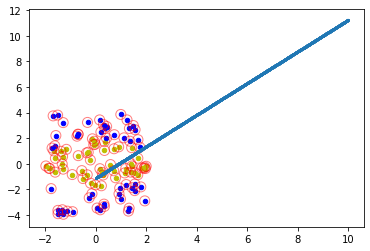

In [6]:
#分别生成第一类，第二类，第三类数据点，使用SVM对其进行分类
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split

def mock_data(point_count=3, point_type=1):
    points = []
    labels = []
    #point_type=1，生成的数据在平面上线性可分
    if point_type == 1:
        return [[1, 3], [2, 2.5], [3.5, 1]], [0, 0, 1]
    #point_type=2，生成的数据基本线性可分，但是存在少许噪音
    elif point_type == 2:
        for i in range(point_count // 2):
            point_x = random.uniform(0, 10)
            point_y = random.uniform(point_x+1, 10)
            points.append([point_x, point_y])
            labels.append(0)
        for i in range(point_count // 2):
            point_y = random.uniform(0, 10)
            point_x = random.uniform(point_y+1, 10)
            points.append([point_x, point_y])
            labels.append(1)
        for i in range(point_count // 6):
            point_y = random.uniform(0, 10)
            point_x = random.uniform(0, 10)
            points.append([point_x, point_y])
            labels.append(random.choice([0, 1]))
    #point_type=3，生成无法线性可分的数据
    elif point_type == 3:
        for i in range(point_count // 2):
            point_x = random.uniform(-2, 2)
            point_y = random.uniform(-math.sqrt(4-point_x*point_x), math.sqrt(4-point_x*point_x))
            points.append([point_x, point_y])
            labels.append(0)
        for i in range(point_count // 2):
            point_x = random.uniform(-2, 2)
            point_y = random.choice([random.uniform(-4, -math.sqrt(4-point_x*point_x)), random.uniform(math.sqrt(4-point_x*point_x), 4)])
            points.append([point_x, point_y])
            labels.append(1)
    return points, labels
#绘制分类结果及超平面
def plot_point(dataArr, labelArr, Support_vector_index, W=0, b=0):
    for i in range(np.shape(dataArr)[0]):
        if labelArr[i] == 1:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='b', s=20)
        else:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='y', s=20)
    for j in Support_vector_index:
        plt.scatter(dataArr[j][0], dataArr[j][1], s=100, c='',edgecolors='r',  marker='o', alpha=0.5, linewidths=1)
    x = np.arange(0, 10, 0.01)
    y = (W[0][0] * x + b)/(-1 * W[0][1])
    plt.scatter(x, y, s=5, marker='h')
    plt.show()
if __name__ == '__main__':
    #分别生成第一类，第二类，第三类数据
    #补充代码
    dataArr,labelArr = mock_data(100,3)
#     print(dataArr)
#     print(labelArr)
    dataArr_train, dataArr_test, labelArr_train, labelArr_test = train_test_split(dataArr, labelArr, train_size=0.8, test_size=0.2, random_state=1)
    
    #定义SVM分类器，核函数定义为线性核函数，其他参数使用默认值
    #补充代码
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', 
              kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
    #fit训练数据
    clf.fit(dataArr, labelArr)
    train_score = clf.score(dataArr_train, labelArr_train)
    test_score = clf.score(dataArr_test, labelArr_test)
    print(train_score)
    print(test_score)
    #获取模型返回值
    n_Support_vector = clf.n_support_   #支持向量个数
    Support_vector_index = clf.support_ #支持向量索引
    W = clf.coef_   #方向向量
    b = clf.intercept_  #截距项b
    #绘制分类超平面
    plot_point(dataArr, labelArr, Support_vector_index, W, b)

0.7625
0.75


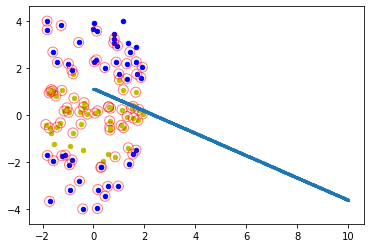

In [5]:
#修改mian函数，生成第三类数据点，并将数据集划分为训练集和测试集，训练集：测试集=8:2，计算在测试集上的准确率
#测试三组数据，并输出准确率

if __name__ == '__main__':
    #分别生成第一类，第二类，第三类数据
    #补充代码
    dataArr,labelArr = mock_data(100,3)
#     print(dataArr)
#     print(labelArr)
    dataArr_train, dataArr_test, labelArr_train, labelArr_test = train_test_split(dataArr, labelArr, train_size=0.8, test_size=0.2, random_state=1)
    
    #定义SVM分类器，核函数定义为线性核函数，其他参数使用默认值
    #补充代码
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', 
              kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
    #fit训练数据
    clf.fit(dataArr, labelArr)
    train_score = clf.score(dataArr_train, labelArr_train)
    test_score = clf.score(dataArr_test, labelArr_test)
    print(train_score)
    print(test_score)
    #获取模型返回值
    n_Support_vector = clf.n_support_   #支持向量个数
    Support_vector_index = clf.support_ #支持向量索引
    W = clf.coef_   #方向向量
    b = clf.intercept_  #截距项b
    #绘制分类超平面
    plot_point(dataArr, labelArr, Support_vector_index, W, b)

In [7]:
#将SVM的参数中的核函数修改为rbf，测试若干组数据，观察并分析准确率
if __name__ == '__main__':
    #分别生成第一类，第二类，第三类数据
    #补充代码
    dataArr,labelArr = mock_data(100,3)
#     print(dataArr)
#     print(labelArr)
    dataArr_train, dataArr_test, labelArr_train, labelArr_test = train_test_split(dataArr, labelArr, train_size=0.8, test_size=0.2, random_state=1)
    
    #定义SVM分类器，核函数定义为线性核函数，其他参数使用默认值
    #补充代码
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', 
              kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
    #fit训练数据
    clf.fit(dataArr, labelArr)
    train_score = clf.score(dataArr_train, labelArr_train)
    test_score = clf.score(dataArr_test, labelArr_test)
    print(train_score)
    print(test_score)

0.9375
0.95


In [1]:
#对鸢尾花数据集进行SVM分类
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets

#获取鸢尾花数据集
iris = datasets.load_iris()
data = iris.data
target = iris.target
labels = iris.feature_names
x = data[:,:2]
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

#linear核函数
clf1 = svm.SVC(C=1,kernel='linear', decision_function_shape='ovr').fit(x_train,y_train)
#rbf核函数
clf2 = svm.SVC(C=1, kernel='rbf', gamma=1).fit(x_train,y_train)
#poly核函数
clf3 = svm.SVC(kernel='poly').fit(x_train,y_train)
#sigmoid核函数
clf4 = svm.SVC(kernel='sigmoid').fit(x_train,y_train)

#打印使用不同核函数进行分类时，训练集和测试集分类的准确率
print("linear_train：",clf1.score(x_train,y_train))
print("linear_test：",clf1.score(x_test,y_test))

print("poly_train：",clf3.score(x_train,y_train))
print("poly_test：",clf3.score(x_test,y_test))
print("sigmoid_train：",clf4.score(x_train,y_train))
print("sigmoid_test：",clf4.score(x_test,y_test))

clf21 = svm.SVC(C=1,kernel='rbf',gamma=5).fit(x_train,y_train)
clf22 = svm.SVC(C=1,kernel='rbf',gamma=10).fit(x_train,y_train)
clf23 = svm.SVC(C=1,kernel='rbf',gamma=50).fit(x_train,y_train)
print("gamma=1,train",clf2.score(x_train,y_train))
print("gamma=1,test：",clf2.score(x_test,y_test))
print("gamma=5,train：",clf21.score(x_train,y_train))
print("gamma=5,test：",clf21.score(x_test,y_test))
print("gamma=10,train：",clf22.score(x_train,y_train))
print("gamma=10,test：",clf22.score(x_test,y_test))
print("gamma=50,train：",clf23.score(x_train,y_train))
print("gamma=50,test：",clf23.score(x_test,y_test))

linear_train： 0.8166666666666667
linear_test： 0.8
poly_train： 0.825
poly_test： 0.8333333333333334
sigmoid_train： 0.36666666666666664
sigmoid_test： 0.2
gamma=1,train 0.8
gamma=1,test： 0.8333333333333334
gamma=5,train： 0.8083333333333333
gamma=5,test： 0.8333333333333334
gamma=10,train： 0.8333333333333334
gamma=10,test： 0.8666666666666667
gamma=50,train： 0.9083333333333333
gamma=50,test： 0.7666666666666667
